In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [81]:
df = pd.read_csv('train_hipoteses.csv')

# Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

In [82]:
#definindo dataset apenas onde a marca_popular é verdadeira ,ou seja, igual a 1
popular = df[df.marca_popular==1]
popular.head()

,id,num_fotos,marca_popular,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco,predito,resid
0,"3,00716E+38",8.0,1,"(2015, 2018]","(2016, 2018]",67772.0,CVT,4,Sedã,0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,7.473259e+15,9.334009e+15,-1.860750e+15
3,"5,68625E+37",14.0,1,"(1984, 2015]","(1996, 2016]",85357.0,Automática,4,Picape,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.236814e+16,1.029320e+16,2.074940e+15
5,"3,04613E+38",13.0,1,"(2015, 2018]","(2016, 2018]",85314.0,Manual,4,Sedã,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.132585e+15,9.172236e+15,-4.039651e+15
6,"2,30951E+38",14.0,1,"(2018, 2019]","(2018, 2020]",27834.0,CVT,4,Sedã,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.736680e+15,9.702320e+15,3.436006e+13
7,"1,90159E+38",15.0,1,"(2015, 2018]","(2016, 2018]",95054.0,Automática,4,Hatchback,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.626304e+16,9.608503e+15,3.665454e+16


In [83]:
#Aqui estamos analisando quantos carros de marca popular tem por estado
popular_estado = popular[['marca_popular','estado_vendedor']].groupby('estado_vendedor').count().sort_values('marca_popular',ascending=False)
popular_estado

,marca_popular
estado_vendedor,
São Paulo (SP),10544
Rio de Janeiro (RJ),1643
Paraná (PR),1542
Santa Catarina (SC),1417
Minas Gerais (MG),1136
Rio Grande do Sul (RS),973
Goiás (GO),517
Bahia (BA),439
Pernambuco (PE),222


## Presumindo apenas pelo número de carros de marca popular, assumisse que SP será mais fácil para vender um carro de marca popular, devido a aceitação das pessoas

In [84]:
#estamos selecionando os 6 estados que mais apresentem carros de marca popular para fazer nossa análise de preço
selecao_estados = popular_estado.index[0:6]

In [85]:
def listaFiltro(dataframe,nome, valores):
    return dataframe.loc[dataframe[nome].isin(valores)]
lista = selecao_estados.values
dfteste = listaFiltro(popular,'estado_vendedor' ,lista)

In [86]:
dfteste[['estado_vendedor','preco']].groupby('estado_vendedor').mean().sort_values('preco',ascending=False)

,preco
estado_vendedor,
Paraná (PR),1.013718e+16
Rio Grande do Sul (RS),1.011545e+16
São Paulo (SP),9.739563e+15
Minas Gerais (MG),9.607157e+15
Santa Catarina (SC),9.601864e+15
Rio de Janeiro (RJ),9.463461e+15


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


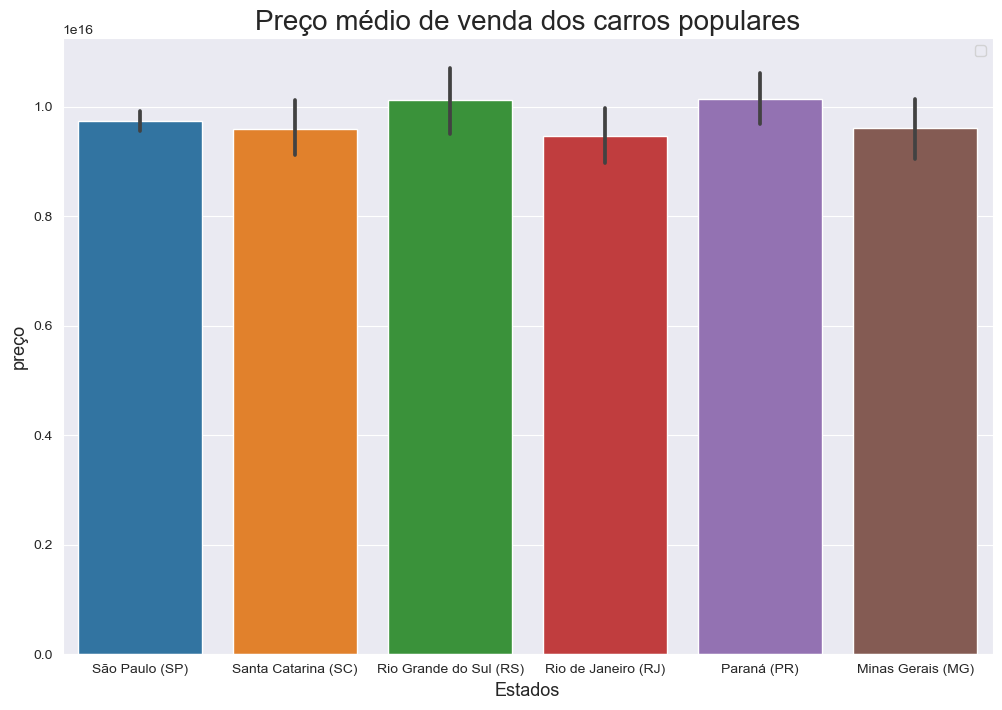

In [87]:
plt.figure(figsize=(12, 8))
sns.barplot(data=dfteste,x='estado_vendedor',y='preco')
plt.xlabel('Estados', fontsize=13)
plt.ylabel('preço', fontsize=13)
plt.title('Preço médio de venda dos carros populares', fontsize=20)
plt.legend(fontsize=10)
plt.show()

# Aqui tiramos insights importantes, PR é o estado com média de preço mais alta, o que influencia muito na decisão, pois estamos querendo obter lucro, entretanto, SP está entre os 3, e por conter um maior número de carros pode ter maior influência nessa média de preço, portanto definimos:

# Que SP é o melhor estado para se vender um carro de marca popular, além de alcançar um preço de mercado, terá uma maior facilidade em fechar negócio, devido a análise de aceitação das pessoas em comprarem carros de marca popular

## Agora vamos responder o próximo problema de negócio

# Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

In [88]:
#verificando os estados com maior número de picapes automáticas
picape_automatica = df[(df.tipo == 'Picape')& (df.cambio == 'Automática')] [['estado_vendedor','tipo']].groupby('estado_vendedor').count().sort_values('tipo',ascending=False)
picape_automatica

,tipo
estado_vendedor,
São Paulo (SP),1712
Paraná (PR),348
Rio de Janeiro (RJ),318
Santa Catarina (SC),283
Minas Gerais (MG),211
Rio Grande do Sul (RS),198
Goiás (GO),102
Bahia (BA),68
Pernambuco (PE),14


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


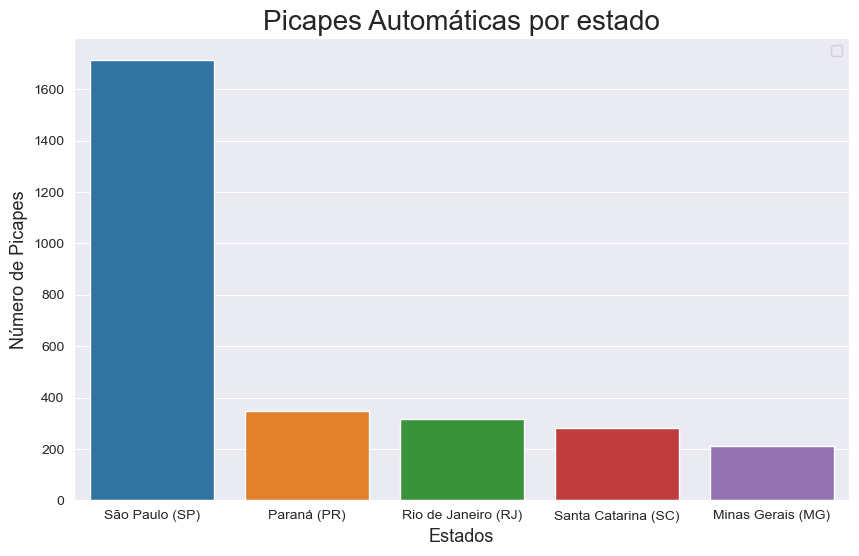

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x= picape_automatica[0:5].reset_index()['estado_vendedor'] , y= picape_automatica[0:5].reset_index()['tipo'])
plt.xlabel('Estados', fontsize=13)
plt.ylabel('Número de Picapes', fontsize=13)
plt.title('Picapes Automáticas por estado', fontsize=20)
plt.legend(fontsize=10)
plt.show()

In [90]:
picape_automatica = df[(df.tipo == 'Picape')& (df.cambio == 'Automática')] [['estado_vendedor','preco']].groupby('estado_vendedor').mean().sort_values('preco').reset_index()

In [91]:
lista = ['São Paulo (SP)','Paraná (PR)','Rio de Janeiro (RJ)','Santa Catarina (SC)','Minas Gerais (MG)']
picape_automatica_ = listaFiltro(picape_automatica,'estado_vendedor' ,lista)

In [92]:
picape_automatica_.sort_values('preco')

,estado_vendedor,preco
5,Minas Gerais (MG),9.823477e+15
6,Paraná (PR),1.029761e+16
9,Santa Catarina (SC),1.056219e+16
10,Rio de Janeiro (RJ),1.069470e+16
12,São Paulo (SP),1.096151e+16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


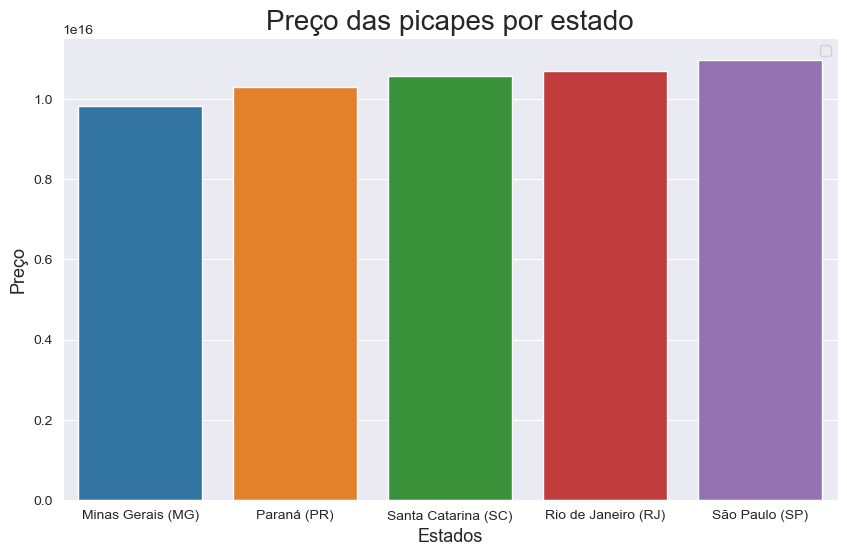

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(data=picape_automatica_,x='estado_vendedor',y='preco')
plt.xlabel('Estados', fontsize=13)
plt.ylabel('Preço', fontsize=13)
plt.title('Preço das picapes por estado', fontsize=20)
plt.legend(fontsize=10)
plt.show()

# Dentre os estados com maior quantidade de picapes automáticas analisamos também no gráfico os preços, e vimos MG como sendo o estado que se consegue comprar pelo menor preço, por não tem um número tão grande de picapes quanto SP, vamos analisar mais alguns dados de MG

In [101]:
picape_minas = df[(df.estado_vendedor=='Minas Gerais (MG)')&(df.tipo=='Picape')&(df.cambio=='Automática')]
picape_minas[['estado_vendedor','ipva_pago','dono_aceita_troca']].groupby('estado_vendedor').mean()

,ipva_pago,dono_aceita_troca
estado_vendedor,,
Minas Gerais (MG),0.611374,0.777251


# Como podemos ver 61% das picapes de minas estão com ipva pago, o que evita que nossa compra aumente de valor em gastos futuros, e também 78% aceitam troca, o que facilitaria nossa negociação, sendo assim reafirmamos Minas Gerais como melhor estado para comprar picapes automáticas


## **

# Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

In [95]:
garantia_de_fabrica = df.copy()

In [96]:
garantia_estado = garantia_de_fabrica[['estado_vendedor','garantia_de_fábrica','preco','revisoes_dentro_agenda']].groupby('estado_vendedor').sum().sort_values('garantia_de_fábrica',ascending=False)[0:5].reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


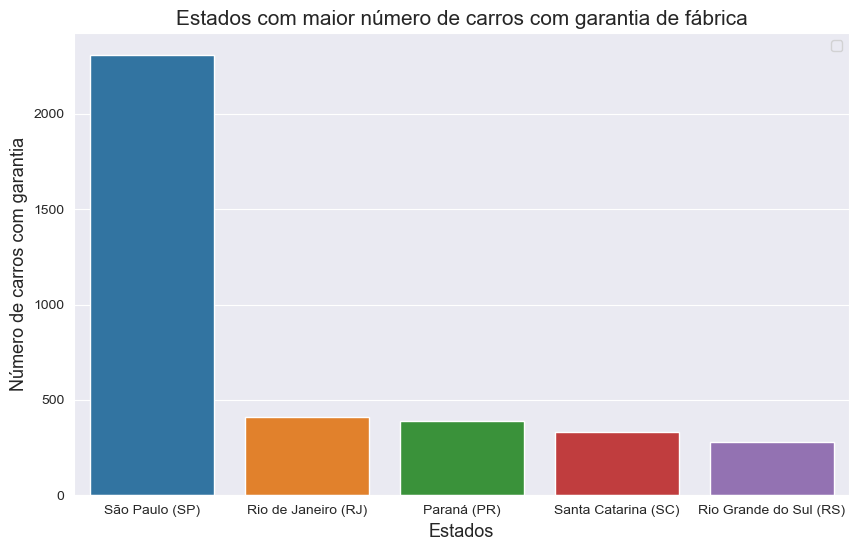

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(data=garantia_estado,x='estado_vendedor',y='garantia_de_fábrica')
plt.xlabel('Estados', fontsize=13)
plt.ylabel('Número de carros com garantia', fontsize=13)
plt.title('Estados com maior número de carros com garantia de fábrica', fontsize=15)
plt.legend(fontsize=10)
plt.show()

In [98]:
#selecionando os estados com maior número de carros com garantia para analisar mais a fundo
lista = ['São Paulo (SP)','Paraná (PR)','Rio de Janeiro (RJ)','Santa Catarina (SC)','Rio Grande do Sul (RS)']
garantia_revisao = listaFiltro(df,'estado_vendedor' ,lista)

# Visto que para a garantia de fábrica poder ser acionada, as revisões precisam estar em dia, vamos filtrar essa condição para analisar o preço

In [99]:
estado_preco = garantia_revisao[(garantia_revisao.garantia_de_fábrica==1)&(garantia_revisao.revisoes_dentro_agenda==1)][['estado_vendedor','preco']].groupby('estado_vendedor').mean().sort_values('preco',ascending=False).reset_index()
estado_preco

,estado_vendedor,preco
0,Santa Catarina (SC),1.136324e+16
1,Rio Grande do Sul (RS),1.100160e+16
2,Paraná (PR),1.093814e+16
3,Rio de Janeiro (RJ),1.072757e+16
4,São Paulo (SP),9.900599e+15


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


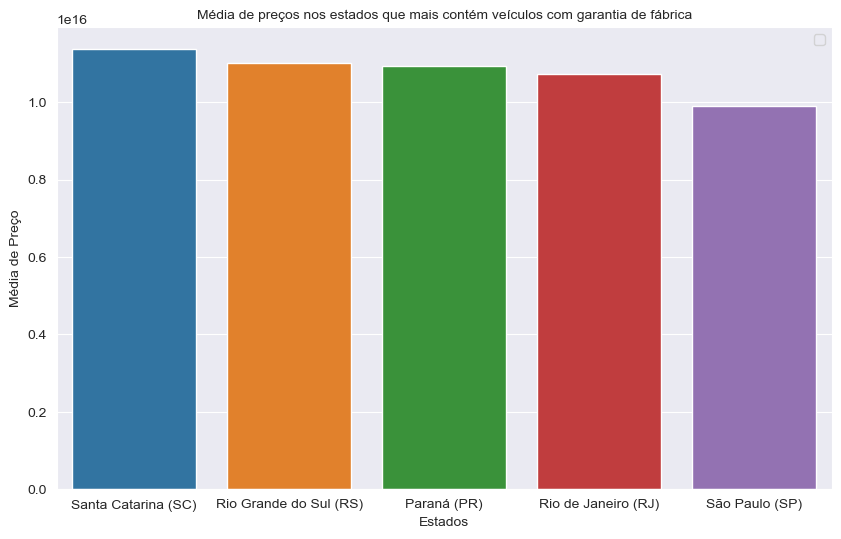

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(data=estado_preco,x='estado_vendedor',y='preco')
plt.xlabel('Estados', fontsize=10)
plt.ylabel('Média de Preço', fontsize=10)
plt.title('Média de preços nos estados que mais contém veículos com garantia de fábrica', fontsize=10)
plt.legend(fontsize=10)
plt.show()

# Como SP é o estado que mais contém veículos com garantia de fábrica, e além disso tem a menor média de preço nas condições necessárias para a garantia ser efetuada, definimos SP como o melhor estado para comprar veículos na garantia